In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leitura dos arquivos CSV

df_vendas = pd.read_csv('..\\BASE_DADOS\\olist_order_items_dataset.csv')
df_produtos = pd.read_csv('..\\BASE_DADOS\\olist_products_dataset.csv')

Categoria com maior volume de vendas:
Categoria: cama_mesa_banho
Volume de Vendas: 11115


Categoria com menor volume de vendas:
Categoria: seguros_e_servicos
Volume de Vendas: 2


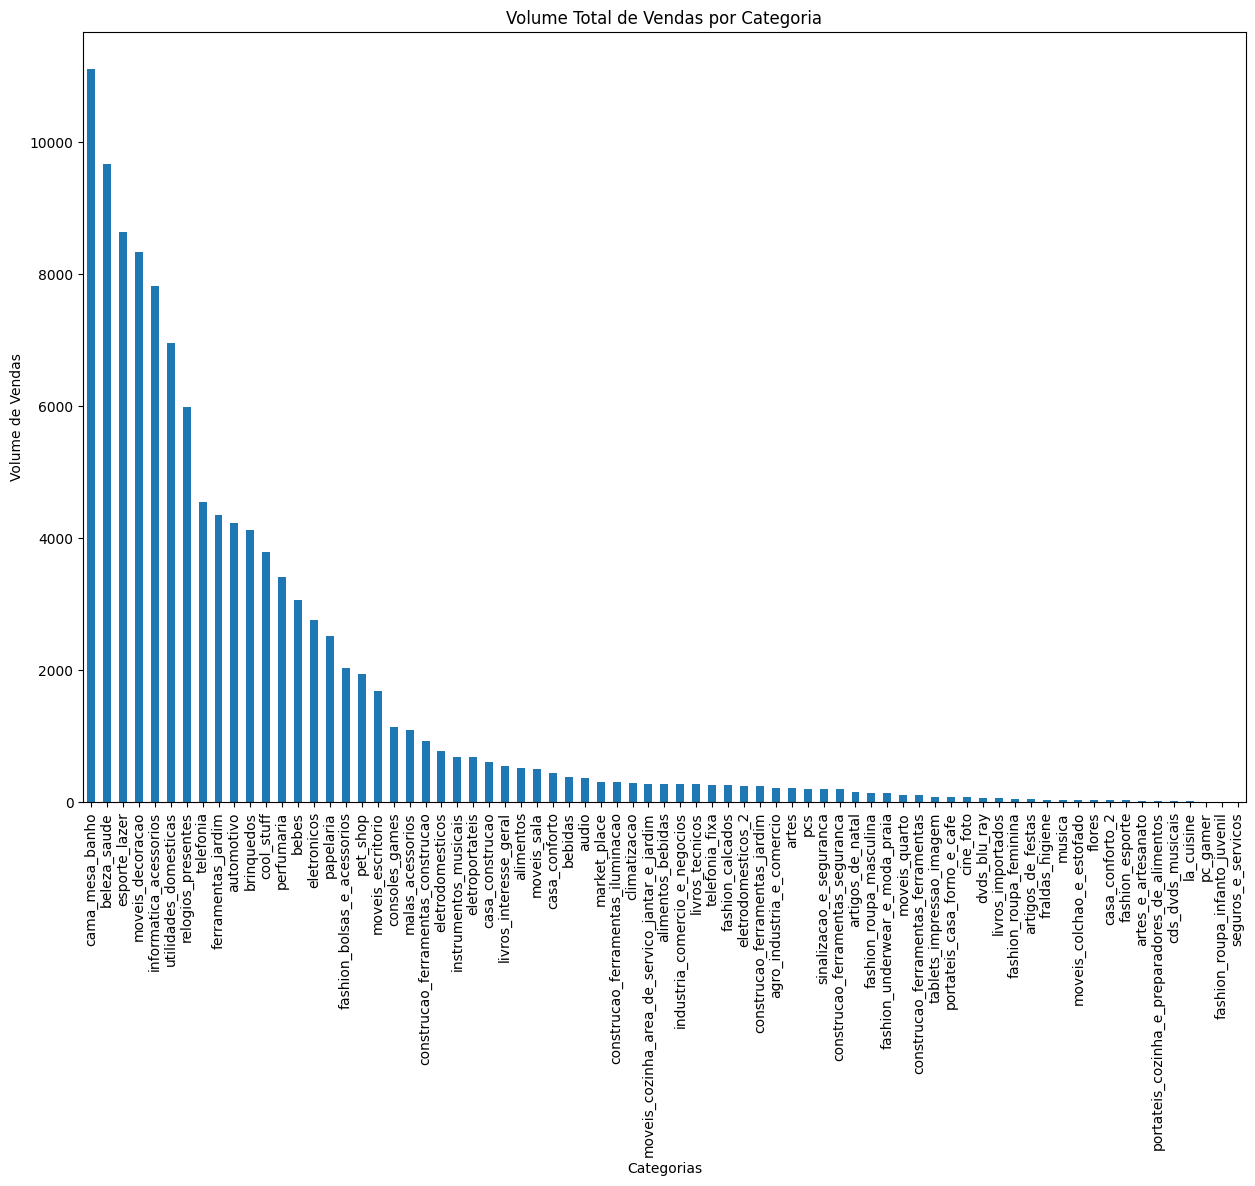

In [3]:
#QUESTAO 1 - Análise de Performance de Vendas
#a.	Volume de Vendas por Categoria: Identificar quais categorias de 
#produtos têm o maior volume de vendas e em quais períodos (mensal, trimestral).


# Carregamento os dados
produtos = df_produtos
vendas = df_vendas

# Mesclagem das tabelas de produtos e vendas
dados_merged = pd.merge(vendas, produtos, on='product_id')

# Volume de vendas por categoria (total)
volume_vendas_total = dados_merged['product_category_name'].value_counts()

# Identificação da categoria com maior volume de vendas
categoria_maior_volume = volume_vendas_total.idxmax()
volume_maior_categoria = volume_vendas_total.max()

# Identificação da categoria com menor volume de vendas
categoria_menor_volume = volume_vendas_total.idxmin()
volume_menor_categoria = volume_vendas_total.min()


# RESULTADOS


print("Categoria com maior volume de vendas:")
print(f"Categoria: {categoria_maior_volume}")
print(f"Volume de Vendas: {volume_maior_categoria}")


print("\n\nCategoria com menor volume de vendas:")
print(f"Categoria: {categoria_menor_volume}")
print(f"Volume de Vendas: {volume_menor_categoria}")

# Gráfico do volume total de vendas por categoria
volume_vendas_total.plot(kind='bar', figsize=(15, 10))
plt.title('Volume Total de Vendas por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=90)
plt.show()


RESULTADO DAS VENDAS POR PERIODO
Período mensal da categoria cama_mesa_banho: 2017-11
Volume de Vendas: 852

Período trimestral da categoria cama_mesa_banho: 2018Q2
Volume de Vendas: 2333


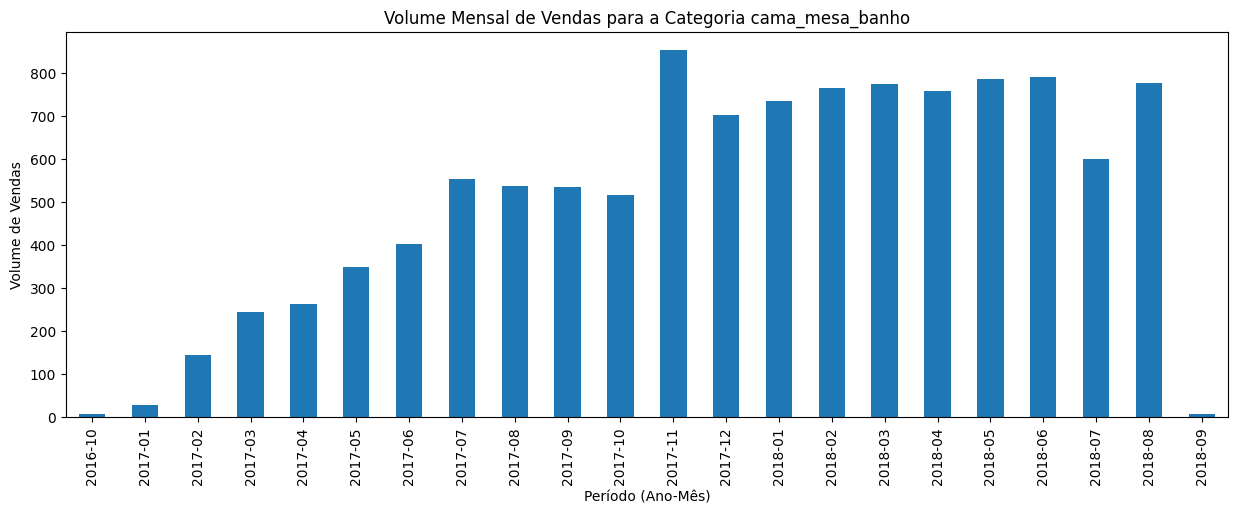

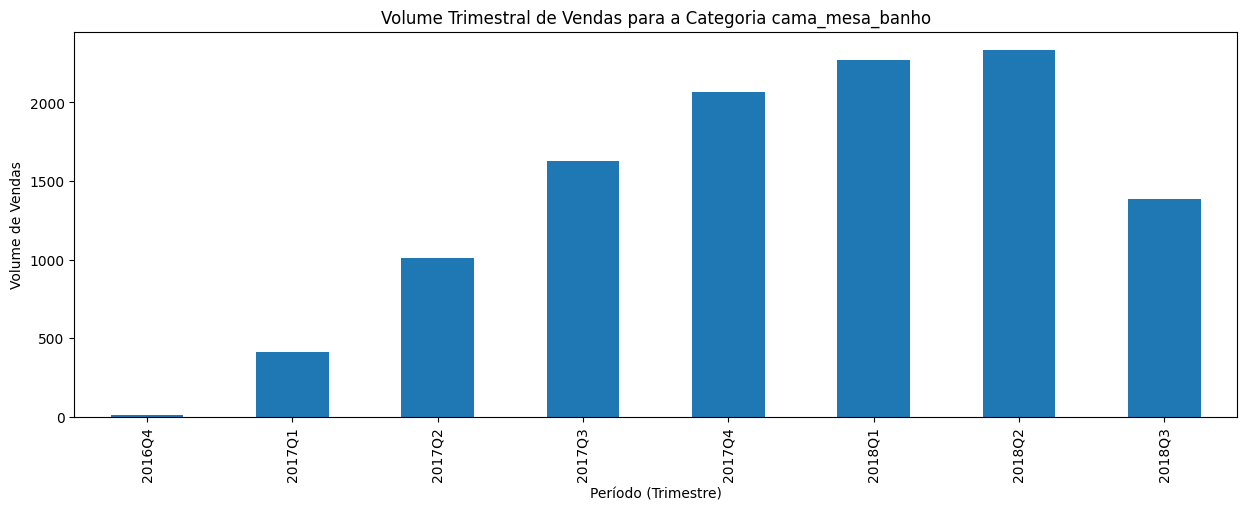

In [4]:

# Mesclagem das tabelas de produtos e vendas
dados_mesclados = pd.merge(vendas, produtos, on='product_id')

# Conversão a coluna de data para datetime
dados_mesclados['shipping_limit_date'] = pd.to_datetime(dados_mesclados['shipping_limit_date'])

# Extração do ano e mês
dados_mesclados['ano_mes'] = dados_mesclados['shipping_limit_date'].dt.to_period('M')
dados_mesclados['trimestre'] = dados_mesclados['shipping_limit_date'].dt.to_period('Q')


# Filtragem dos dados para a categoria com maior volume de vendas
dados_categoria_maior_volume = dados_mesclados[dados_mesclados['product_category_name'] == categoria_maior_volume]

# Calculo do volume de vendas por período mensal e trimestral
volume_vendas_mensal = dados_categoria_maior_volume['ano_mes'].value_counts().sort_index()
volume_vendas_trimestral = dados_categoria_maior_volume['trimestre'].value_counts().sort_index()

# Identificação do período com maior volume de vendas mensal e trimestral
mes_com_maior_vendas = volume_vendas_mensal.idxmax()
trimestre_com_maior_vendas = volume_vendas_trimestral.idxmax()


#RESULTADOS

print("RESULTADO DAS VENDAS POR PERIODO")
print(f"Período mensal da categoria {categoria_maior_volume}: {mes_com_maior_vendas}")
print(f"Volume de Vendas: {volume_vendas_mensal.max()}")

print(f"\nPeríodo trimestral da categoria {categoria_maior_volume}: {trimestre_com_maior_vendas}")
print(f"Volume de Vendas: {volume_vendas_trimestral.max()}")

# Gráfico do volume de vendas mensal 
volume_vendas_mensal.plot(kind='bar', figsize=(15, 5))
plt.title(f'Volume Mensal de Vendas para a Categoria {categoria_maior_volume}')
plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=90)
plt.show()

# Gráfico do volume de vendas trimestral
volume_vendas_trimestral.plot(kind='bar', figsize=(15, 5))
plt.title(f'Volume Trimestral de Vendas para a Categoria {categoria_maior_volume}')
plt.xlabel('Período (Trimestre)')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=90)
plt.show()
